In [1]:
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.stats.diagnostic import acorr_ljungbox 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
plt.style.use('fivethirtyeight')
from datetime import datetime , date
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
import pylab
import scipy.stats as stats
from scipy.stats import norm
from math import log
from pmdarima.utils import diff_inv


In [3]:
def create_dataset(df):
    x = []
    y = []
    for i in range(30, df.shape[0]):
        x.append(df[i-30:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [65]:
# reading data from csv file
NFLX=pd.read_csv('D:\\R-documantary\\NFLX.csv',index_col='date',parse_dates=True)
dataset=NFLX[NFLX.index>='2018-01-01']
dataset=dataset.dropna()

In [67]:
# take a look at the dataset
dataset

,close
date,
2018-01-02,201.070007
2018-01-03,205.050003
2018-01-04,205.630005
2018-01-05,209.990005
2018-01-08,212.050003
...,...
2021-04-23,505.549988
2021-04-26,510.299988
2021-04-27,505.549988


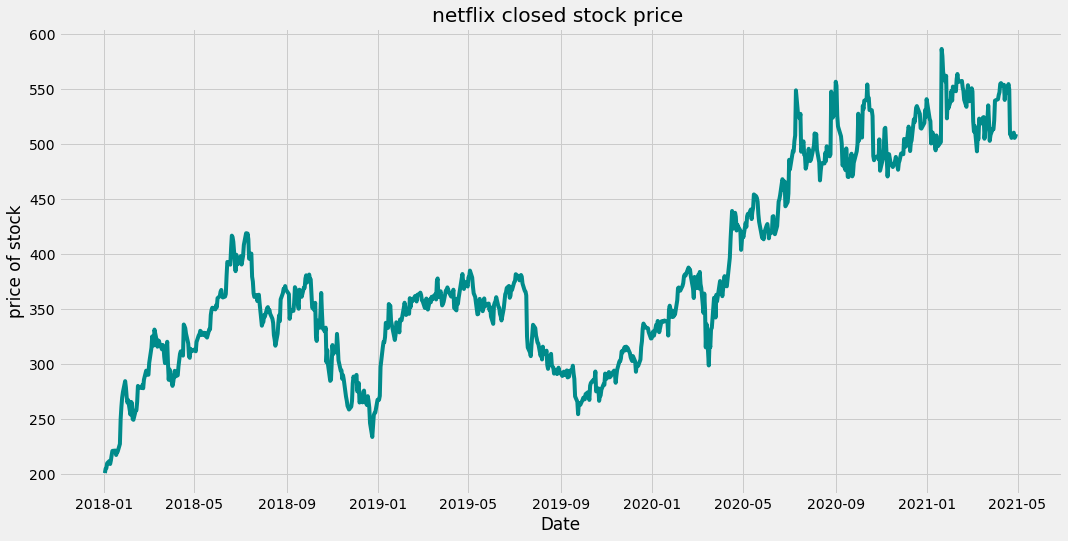

In [71]:
#plotting our data to see the patterns and see if it needs transformation for stationarity
plt.figure(figsize=(16,8))
plt.plot(dataset,color='darkcyan')
plt.xlabel('Date')
plt.ylabel('price of stock')
plt.title('netflix closed stock price ')
plt.show()

In [72]:
dataset.describe()

,close
count,837.000000
mean,381.247312
std,88.776410
min,201.070007
25%,315.339996
50%,359.970001
75%,466.929993
max,586.340027


In [74]:
round(0.9 * len(dataset))

753

In [73]:
#defining train and test datasets
train_size=round(0.9 * len(dataset))
train=dataset[:train_size]
test=dataset[train_size:]
test.head()

,close
date,
2020-12-29,530.869995
2020-12-30,524.590027
2020-12-31,540.729980
2021-01-04,522.859985
2021-01-05,520.799988


In [75]:
#differenced datasets
differenced_train=dataset.diff().dropna()[:train_size]
differenced_test=dataset.diff().dropna()[train_size:]
differenced_test.head()

,close
date,
2020-12-30,-6.279968
2020-12-31,16.139953
2021-01-04,-17.869995
2021-01-05,-2.059997
2021-01-06,-20.309998


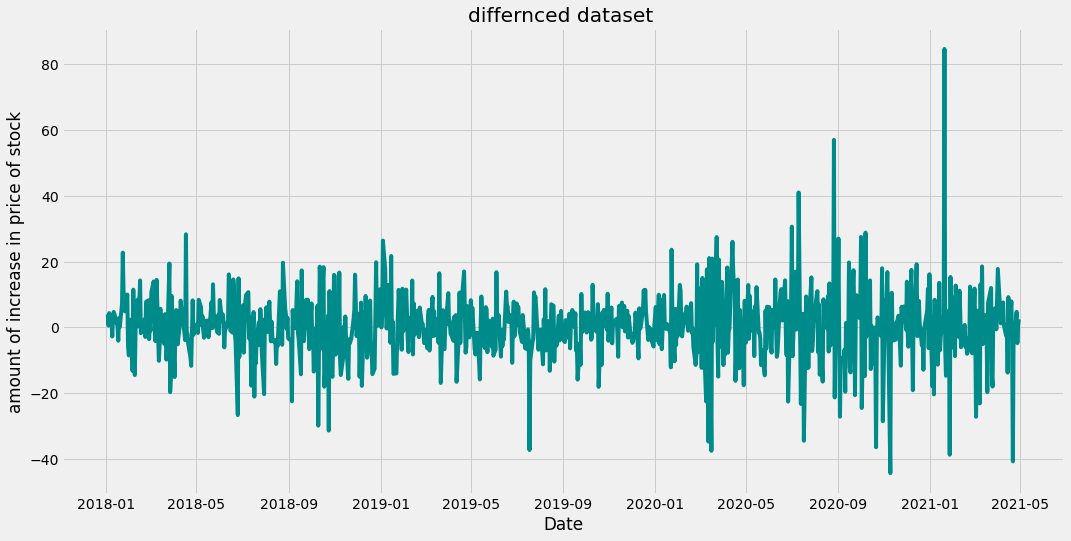

In [78]:
plt.figure(figsize=(16,8))
plt.plot(dataset.diff().dropna(),color='darkcyan')
plt.xlabel('Date')
plt.ylabel('amount of increase in price of stock')
plt.title('differnced dataset ')
plt.show()

In [83]:
# stationarity test
result=adfuller(differenced_train['close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.273619
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [80]:
returns=dataset.pct_change().dropna()
returns.head()
train_returns=returns[:train_size]
test_returns=returns[train_size:]

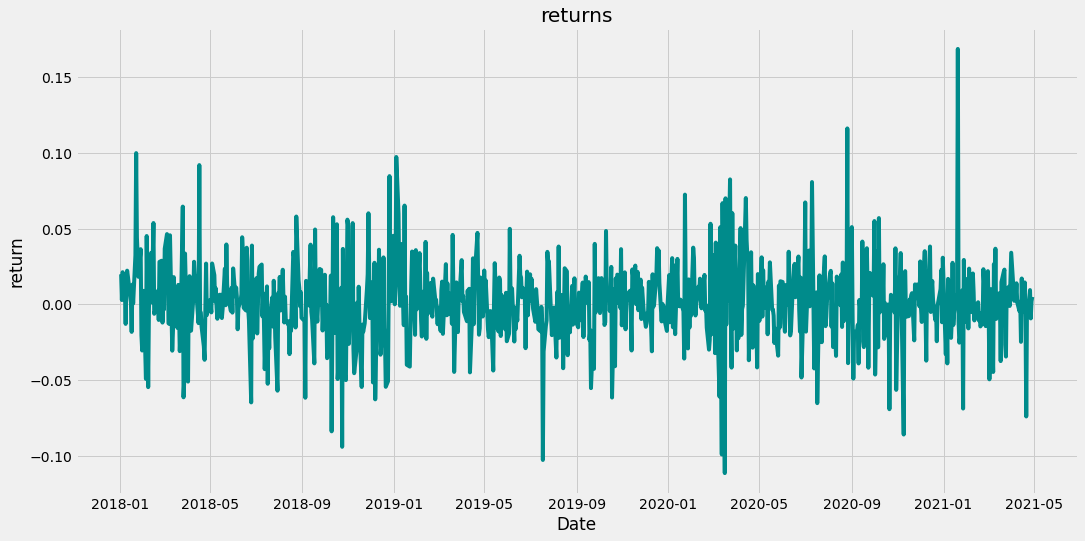

In [79]:
plt.figure(figsize=(16,8))
plt.plot(returns,color='darkcyan')
plt.xlabel('Date')
plt.ylabel('return')
plt.title('returns')
plt.show()

# ARIMA MODEL

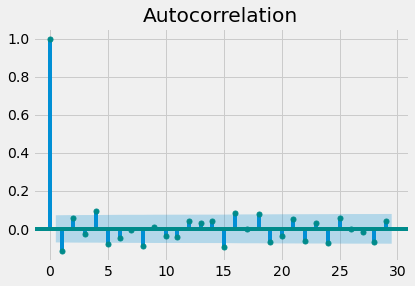

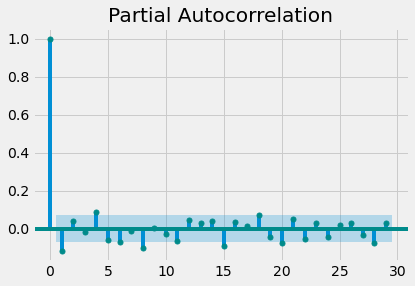

In [82]:
plot_acf(differenced_train)
plot_pacf(differenced_train)
plt.show()

In [84]:
auto_arima(train['close'],trace=True,stepwise=False,max_p=10,max_q=10)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=5585.505, Time=0.75 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=5578.246, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=5578.312, Time=0.20 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=5580.307, Time=0.22 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=5576.322, Time=0.37 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=5571.827, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=5577.354, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=5576.300, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=5578.114, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=5579.956, Time=0.36 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=5575.240, Time=0.64 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=5577.983, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=5578.125, Time=0.38 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=5580.100, Time=0.56 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=5582.013, Time=0.74 sec
 ARIMA(3,1

ARIMA(order=(0, 1, 5), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [85]:
arima_model=ARIMA(train['close'],order=(0,1,5))
arima_model=arima_model.fit()
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  752
Model:                 ARIMA(0, 1, 5)   Log Likelihood               -2778.913
Method:                       css-mle   S.D. of innovations              9.741
Date:                Fri, 09 Jul 2021   AIC                           5571.827
Time:                        17:12:04   BIC                           5604.186
Sample:                             1   HQIC                          5584.294
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4232      0.327      1.292      0.196      -0.219       1.065
ma.L1.D.close    -0.1099      0.037     -3.006      0.003      -0.181      -0.038
ma.L2.D.close     0.0533      0.036     

In [87]:
train.head()

,close
date,
2018-01-02,201.070007
2018-01-03,205.050003
2018-01-04,205.630005
2018-01-05,209.990005
2018-01-08,212.050003


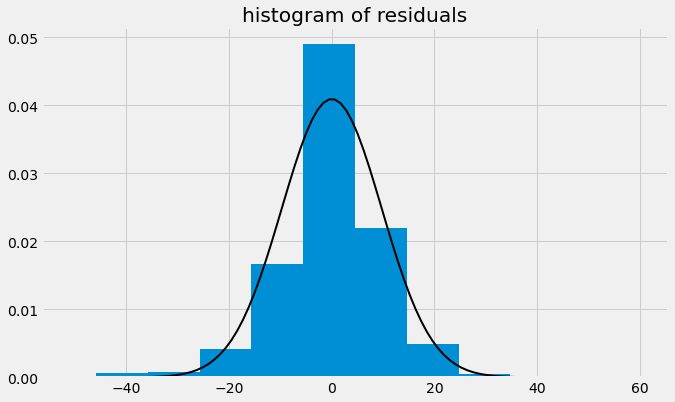

In [89]:
plt.figure(figsize=(10,6))
plt.hist(arima_model.resid,density=True)
plt.title('histogram of residuals')
mu, std = norm.fit(arima_model.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

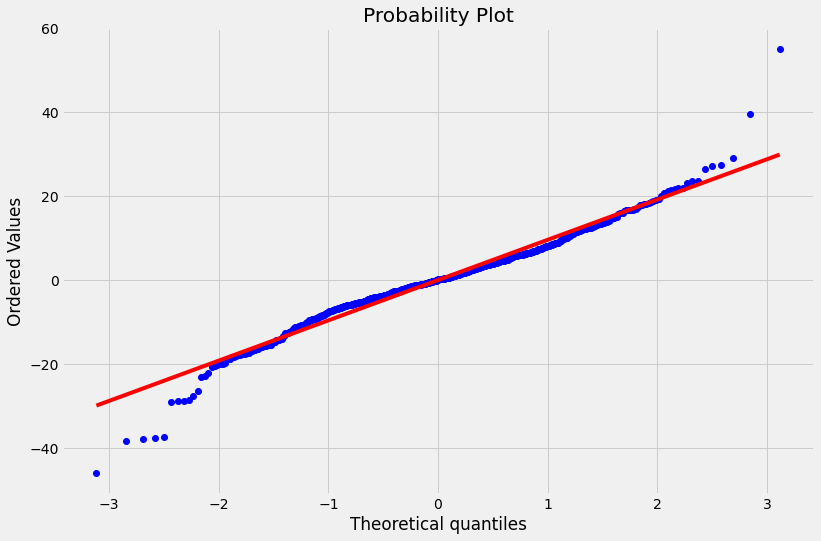

In [91]:
plt.figure(figsize=(12,8))
stats.probplot(arima_model.resid, dist="norm", plot=pylab)
plt.show()

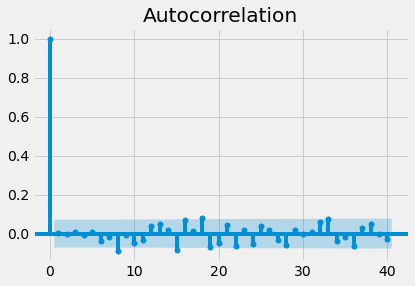

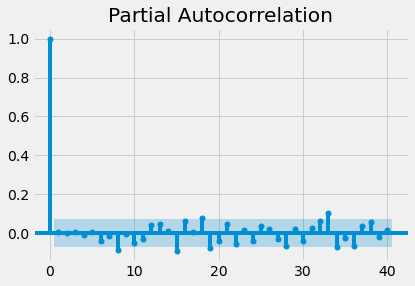

In [95]:
plot_acf(arima_model.resid,lags=40)
plot_pacf(arima_model.resid,lags=40)
plt.show()

In [97]:
acorr_ljungbox(arima_model.resid,return_df=True,lags=20,boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.007739,0.929899,0.007708,0.930038
2,0.008730,0.995645,0.008694,0.995663
3,0.048189,0.997227,0.047891,0.997252
4,0.094221,0.998925,0.093557,0.998939
5,0.139683,0.999631,0.138597,0.999638
6,1.275105,0.973013,1.261972,0.973713
7,1.521556,0.981554,1.505482,0.982119
8,7.398120,0.494349,7.304107,0.504205
9,7.445984,0.590790,7.351273,0.600597
10,9.158638,0.517117,9.036670,0.528627


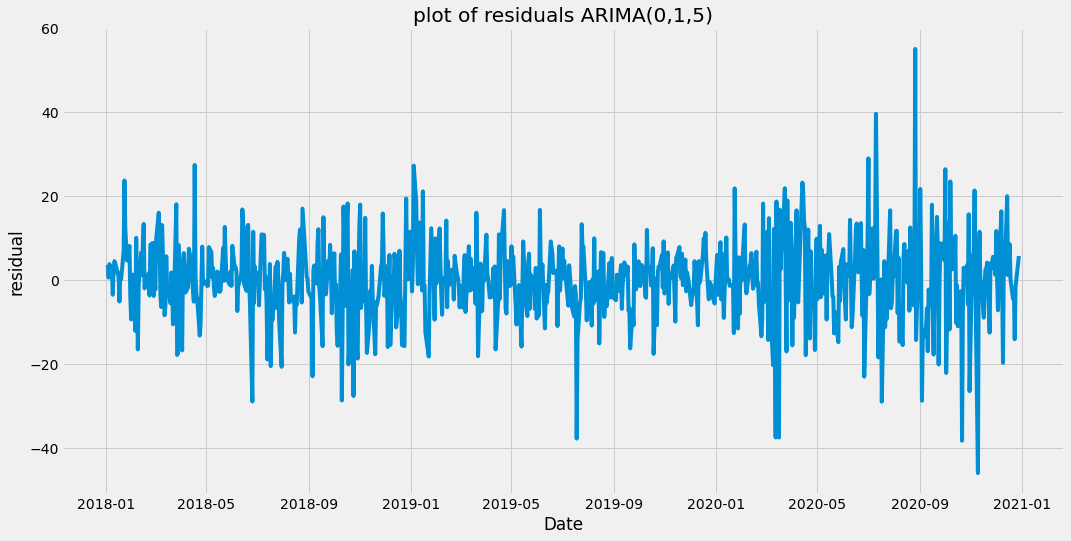

In [98]:
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('residual')
plt.plot(arima_model.resid)
plt.title('plot of residuals ARIMA(0,1,5)')
plt.show()

In [99]:
arima_pred=[]
for i in range(len(test)):
    model=ARIMA(dataset[:train_size+i],order=(0,1,5))
    model=model.fit()
    start=len(train)+i
    arima_pred.append(model.predict(start,start,typ='levels'))

In [103]:
test['arima(1 step ahead)']=arima_pred

In [113]:
arima_pred2=arima_model.forecast(steps=84,alpha=0.05)
test['upper_interval']=arima_pred2[2][:,1]
test['lower_interval']=arima_pred2[2][:,0]
test['prediction(without updating model)']=arima_pred2[0]

In [114]:
test

,close,arima(1 step ahead),upper_interval,lower_interval,prediction(without updating model)
date,,,,,
2020-12-29,530.869995,752 519.402626 dtype: float64,538.494883,500.310368,519.402626
2020-12-30,524.590027,753 529.157691 dtype: float64,544.477397,493.356263,518.916830
2020-12-31,540.729980,754 527.239778 dtype: float64,551.726140,489.186979,520.456559
2021-01-04,522.859985,755 539.908122 dtype: float64,557.493992,485.804806,521.649399
2021-01-05,520.799988,756 526.684286 dtype: float64,562.315842,480.662902,521.489372
...,...,...,...,...,...
2021-04-23,505.549988,831 509.263792 dtype: float64,711.004728,395.455594,553.230161
2021-04-26,510.299988,832 506.715746 dtype: float64,712.406306,394.900437,553.653372
2021-04-27,505.549988,833 506.785502 dtype: float64,713.801891,394.351273,554.076582


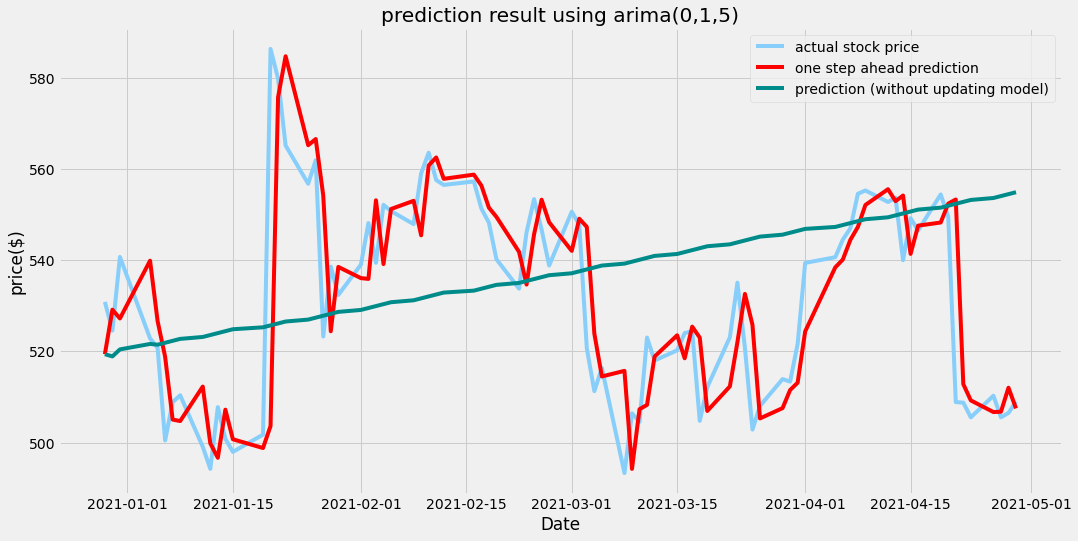

In [148]:
plt.figure(figsize=(16,8))
plt.plot(test['close'],label='actual stock price',color='lightskyblue')
plt.plot(test['arima(1 step ahead)'],label='one step ahead prediction',color='red')
plt.plot(test['prediction(without updating model)'],label='prediction (without updating model)',color='darkcyan')
plt.title('prediction result using arima(0,1,5)')
plt.xlabel('Date')
plt.ylabel('price($)')
plt.legend()
plt.show()


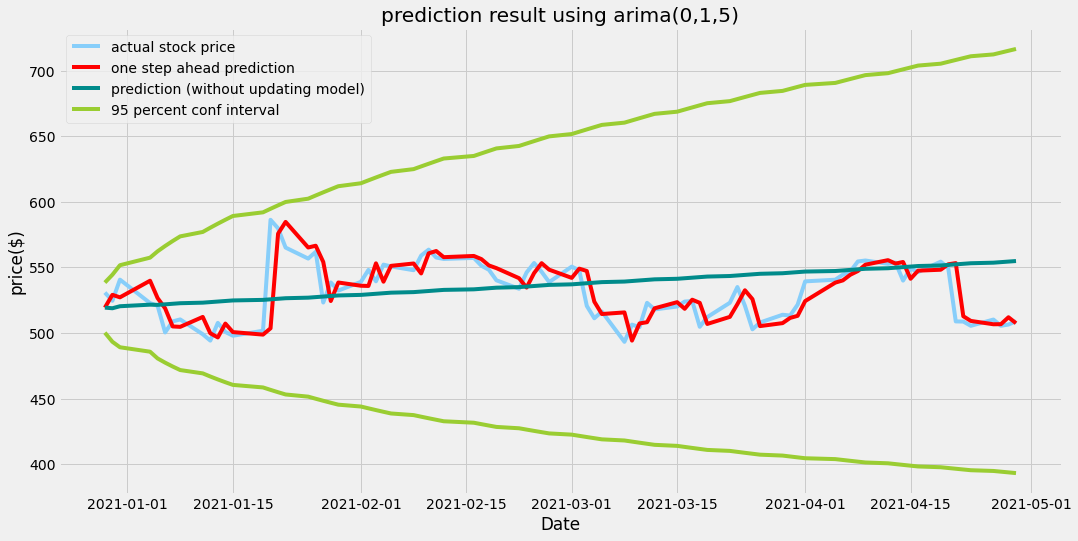

In [153]:
plt.figure(figsize=(16,8))
plt.plot(test['close'],label='actual stock price',color='lightskyblue')
plt.plot(test['arima(1 step ahead)'],label='one step ahead prediction',color='red')
plt.plot(test['prediction(without updating model)'],label='prediction (without updating model)',color='darkcyan')
plt.plot(test['upper_interval'],label='95 percent conf interval',color='yellowgreen')
plt.plot(test['lower_interval'],color='yellowgreen')
plt.title('prediction result using arima(0,1,5)')
plt.xlabel('Date')
plt.ylabel('price($)')
plt.legend()
plt.show()

# calculate MSE of one step ahead prediction

In [119]:
mean_squared_error(test['close'],test['arima(1 step ahead)'])

205.05949777109194

# exponential smoothing models (simple model)

In [120]:
alpha=(0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95,1.00)


In [124]:
sum_of_squared_error=[]
for i in alpha:
    model=SimpleExpSmoothing(train['close']).fit(smoothing_level=i,initial_level=train['close'][0])
    sum_of_squared_error.append(model.sse)


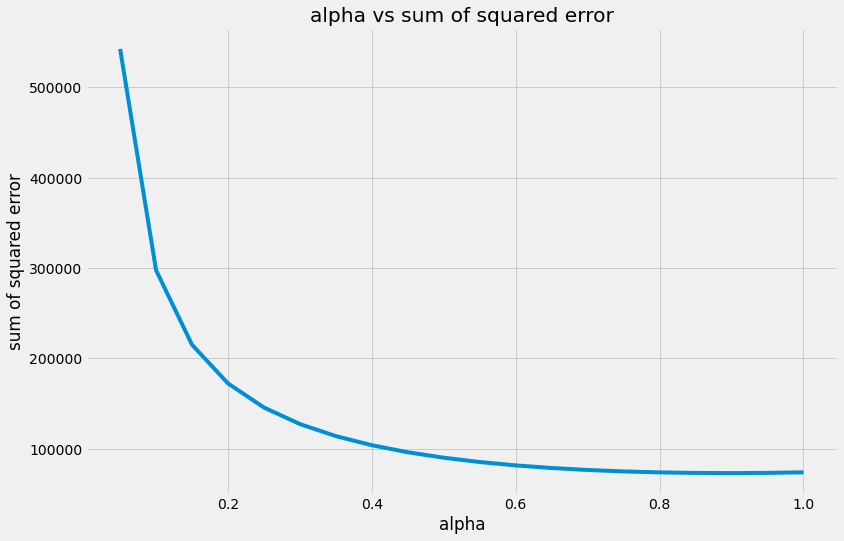

In [130]:
plt.figure(figsize=(12,8))
plt.plot(alpha,sum_of_squared_error)
plt.title('alpha vs sum of squared error')
plt.ylabel('sum of squared error')
plt.xlabel('alpha')
plt.show()

In [132]:
simple_model=SimpleExpSmoothing(train['close']).fit()
print(simple_model.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  close   No. Observations:                  753
Model:             SimpleExpSmoothing   SSE                          72914.115
Optimized:                       True   AIC                           3447.448
Trend:                           None   BIC                           3456.696
Seasonal:                        None   AICC                          3447.502
Seasonal Periods:                None   Date:                 Fri, 09 Jul 2021
Box-Cox:                        False   Time:                         17:31:23
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8963960                alpha                 True
initial_level              201.49371                

In [136]:
train['SES fitted values']=simple_model.fittedvalues

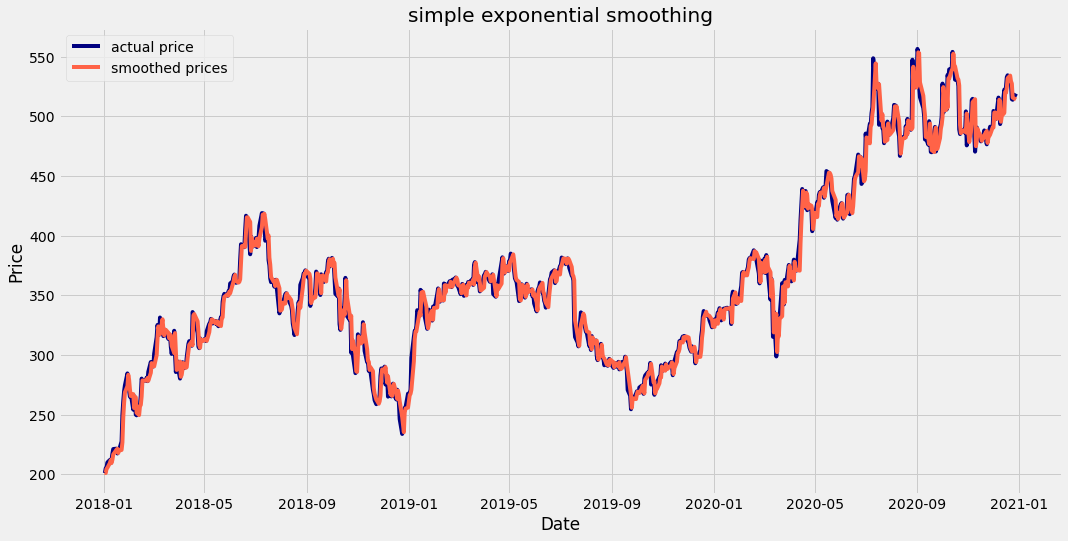

In [145]:
plt.figure(figsize=(16,8))
plt.plot(train['close'],label='actual price',color='navy')
plt.plot(train['SES fitted values'],label='smoothed prices',color='tomato')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('simple exponential smoothing')
plt.legend()
plt.show()


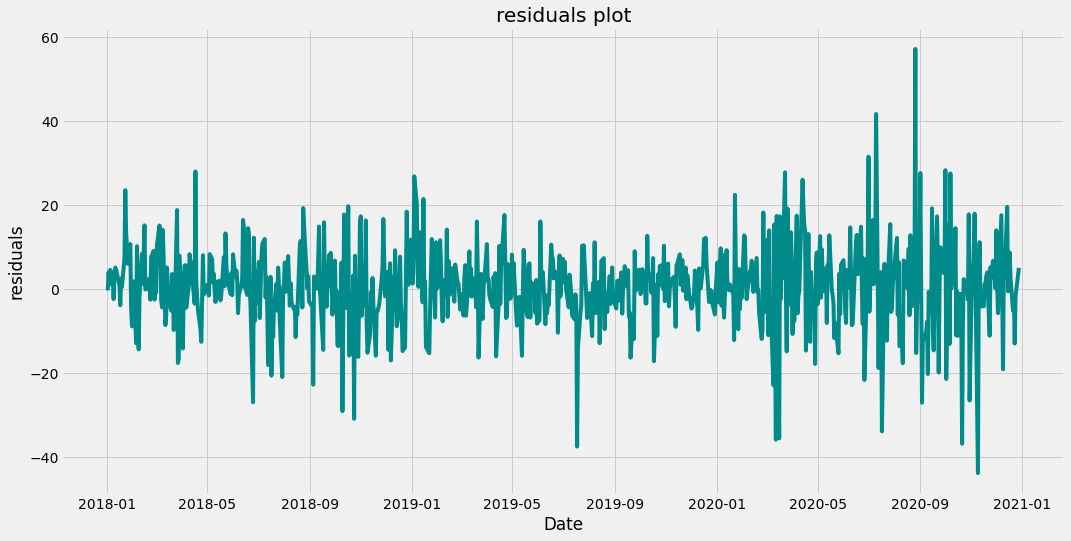

In [147]:
plt.figure(figsize=(16,8))
plt.plot(simple_model.resid,color='darkcyan')
plt.xlabel('Date')
plt.ylabel('residuals')
plt.title('residuals plot')
plt.show()

In [154]:
acorr_ljungbox(simple_model.resid,lags=20,return_df=True,boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.049345,0.824207,0.049149,0.824551
2,2.244913,0.325479,2.233085,0.327410
3,2.315222,0.509611,2.302928,0.511960
4,7.619350,0.106560,7.564904,0.108881
5,11.890964,0.036313,11.796914,0.037679
6,14.272591,0.026735,14.153305,0.027970
7,14.647647,0.040791,14.523890,0.042610
8,21.321387,0.006341,21.109237,0.006863
9,21.329868,0.011264,21.117593,0.012138
10,22.971521,0.010852,22.733154,0.011776


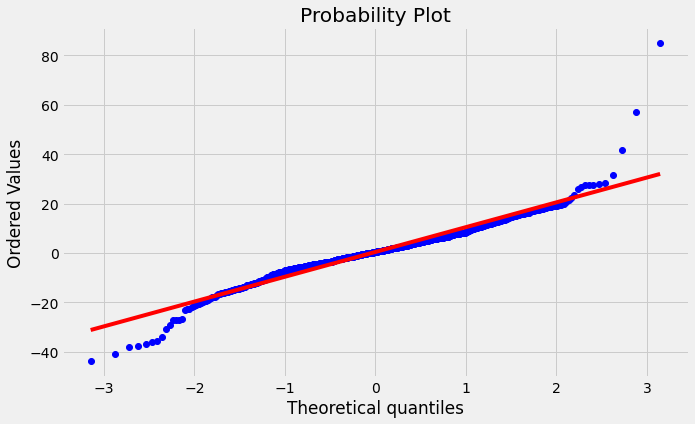

In [283]:
plt.figure(figsize=(10,6))
stats.probplot(simple_model.resid, dist="norm", plot=pylab)
plt.show()

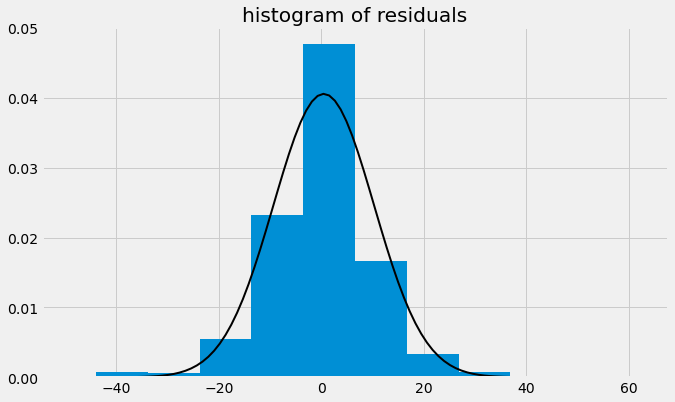

In [156]:
plt.figure(figsize=(10,6))
plt.hist(simple_model.resid,density=True)
plt.title('histogram of residuals')
mu, std = norm.fit(simple_model.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

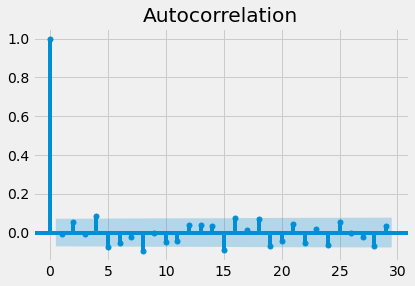

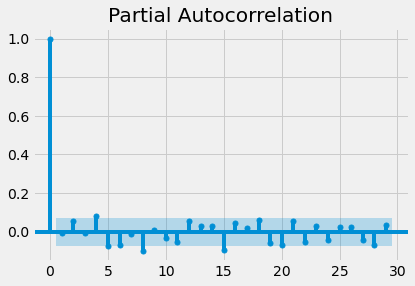

In [157]:
plot_acf(simple_model.resid)
plot_pacf(simple_model.resid)
plt.show()

In [158]:
acorr_ljungbox(simple_model.resid,return_df=True,lags=10)

,lb_stat,lb_pvalue
1,0.049345,0.824207
2,2.244913,0.325479
3,2.315222,0.509611
4,7.619350,0.106560
5,11.890964,0.036313
6,14.272591,0.026735
7,14.647647,0.040791
8,21.321387,0.006341
9,21.329868,0.011264
10,22.971521,0.010852


In [159]:
pred=simple_model.forecast(84)
pred.index=test.index

In [162]:
pred_simple_model=simple_model.forecast()
for i in range(83):
    simple_model=SimpleExpSmoothing(dataset[:train_size+i+1]['close']).fit()
    pred_simple_model=pred_simple_model.append(simple_model.forecast())




In [163]:
pred_simple_model.index=test.index

In [164]:
test['simple exp smoothing prediction']=pred_simple_model
test

,close,arima(1 step ahead),upper_interval,lower_interval,prediction(without updating model),simple exp smoothing prediction
date,,,,,,
2020-12-29,530.869995,752 519.402626 dtype: float64,538.494883,500.310368,519.402626,518.606441
2020-12-30,524.590027,753 529.157691 dtype: float64,544.477397,493.356263,518.916830,529.608261
2020-12-31,540.729980,754 527.239778 dtype: float64,551.726140,489.186979,520.456559,525.109345
2021-01-04,522.859985,755 539.908122 dtype: float64,557.493992,485.804806,521.649399,539.099610
2021-01-05,520.799988,756 526.684286 dtype: float64,562.315842,480.662902,521.489372,524.598856
...,...,...,...,...,...,...
2021-04-23,505.549988,831 509.263792 dtype: float64,711.004728,395.455594,553.230161,509.262370
2021-04-26,510.299988,832 506.715746 dtype: float64,712.406306,394.900437,553.653372,505.945167
2021-04-27,505.549988,833 506.785502 dtype: float64,713.801891,394.351273,554.076582,509.835224


In [165]:
mean_squared_error(test['close'],pred_simple_model)

210.4021667310662

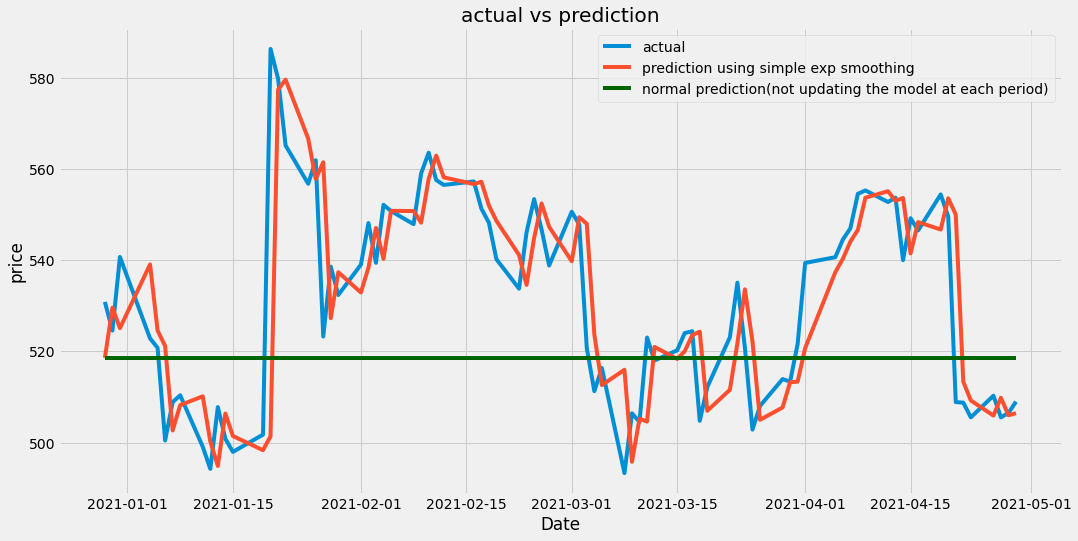

In [166]:
plt.figure(figsize=(16,8))
plt.plot(test['close'],label='actual')
plt.plot(pred_simple_model,label='prediction using simple exp smoothing')
plt.plot(pred,label='normal prediction(not updating the model at each period)',color='darkgreen')
plt.title('actual vs prediction')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()

In [168]:
mse=[]
for i in alpha:
    smodel=SimpleExpSmoothing(train['close']).fit(smoothing_level=i,optimized=True)
    pred_simple_model=smodel.forecast()
    for j in range(83):
        smodel=SimpleExpSmoothing(dataset[:train_size+j+1]['close']).fit(smoothing_level=i)
        pred_simple_model=pred_simple_model.append(smodel.forecast())
    mse.append(mean_squared_error(pred_simple_model,test['close']))
    print('simple exponential model with landa =',i,'  MSE will be ',mean_squared_error(pred_simple_model,test['close']))

simple exponential model with landa = 0.05   MSE will be  515.5250111950622
simple exponential model with landa = 0.1   MSE will be  420.0820990263477
simple exponential model with landa = 0.15   MSE will be  371.3731597541392
simple exponential model with landa = 0.2   MSE will be  336.6228319316936
simple exponential model with landa = 0.25   MSE will be  309.86983271605186
simple exponential model with landa = 0.3   MSE will be  288.7618963838183
simple exponential model with landa = 0.35   MSE will be  271.82909878496383
simple exponential model with landa = 0.4   MSE will be  258.07734949829694
simple exponential model with landa = 0.45   MSE will be  246.8274782332964
simple exponential model with landa = 0.5   MSE will be  237.6078249115878
simple exponential model with landa = 0.55   MSE will be  230.08269168454007
simple exponential model with landa = 0.6   MSE will be  224.00680391500347
simple exponential model with landa = 0.65   MSE will be  219.1968671662775
simple expone

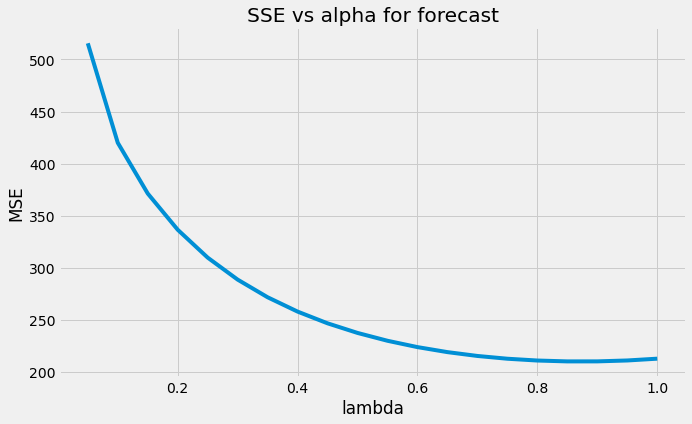

In [171]:
plt.figure(figsize=(10,6))
plt.plot(alpha,mse)
plt.title('SSE vs alpha for forecast')
plt.ylabel('MSE')
plt.xlabel('lambda')
plt.show()

#  double exponential model

In [175]:
double_model=ExponentialSmoothing(train['close'],trend='additive',damped=False,seasonal=None).fit()
double_model.summary()

Dep. Variable:,close,No. Observations:,753
Model:,ExponentialSmoothing,SSE,72747.238
Optimized:,True,AIC,3449.723
Trend:,Additive,BIC,3468.219
Seasonal:,None,AICC,3449.835
Seasonal Periods:,None,Date:,"Fri, 09 Jul 2021"
Box-Cox:,False,Time:,17:47:22
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8941686,alpha,True
smoothing_trend,1.1208e-13,beta,True


In [178]:
train['double_exp_fitted']=double_model.fittedvalues

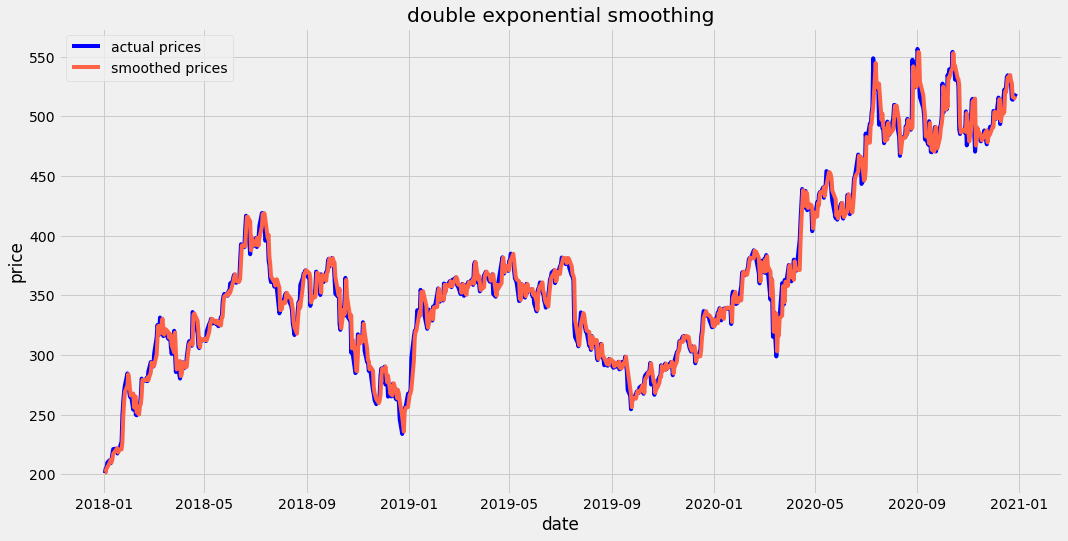

In [179]:
plt.figure(figsize=(16,8))
plt.plot(train['close'],label='actual prices',color='blue')
plt.plot(train['double_exp_fitted'],label='smoothed prices',color='tomato')
plt.xlabel('date')
plt.ylabel('price')
plt.title('double exponential smoothing')
plt.legend()
plt.show()

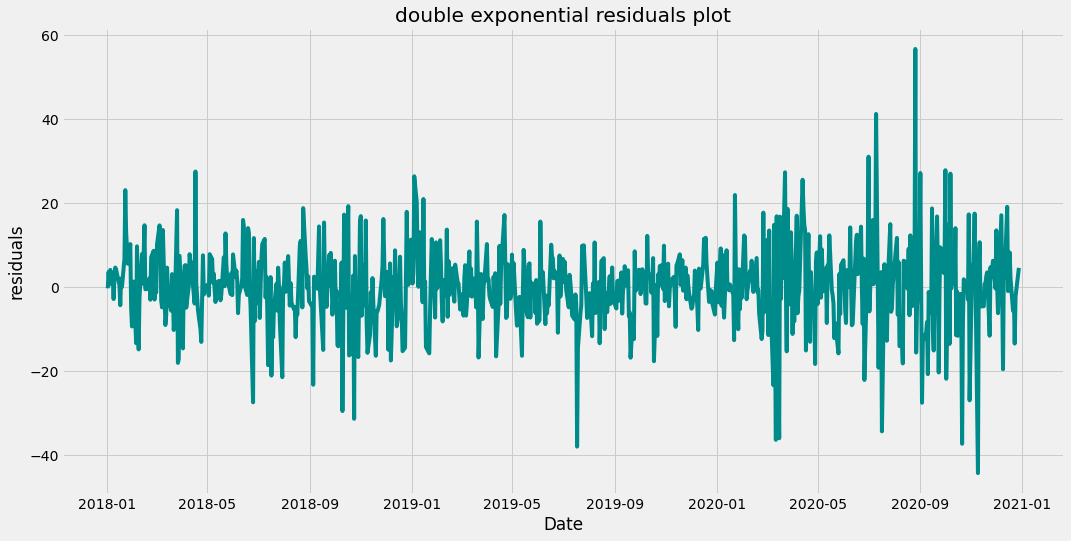

In [180]:
plt.figure(figsize=(16,8))
plt.plot(double_model.resid,color='darkcyan')
plt.xlabel('Date')
plt.ylabel('residuals')
plt.title('double exponential residuals plot')
plt.show()

In [52]:
acorr_ljungbox(double_model.resid,lags=20,return_df=True,boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.024628,0.875297,0.024530,0.875543
2,2.238320,0.326554,2.226494,0.328491
3,2.303738,0.511805,2.291478,0.514155
4,7.585912,0.107980,7.531676,0.110321
5,11.853595,0.036850,11.759790,0.038232
6,14.252202,0.026942,14.132981,0.028185
7,14.638050,0.040929,14.514230,0.042756
8,21.319948,0.006344,21.107626,0.006867
9,21.330181,0.011262,21.117710,0.012138
10,22.982315,0.010812,22.743585,0.011734


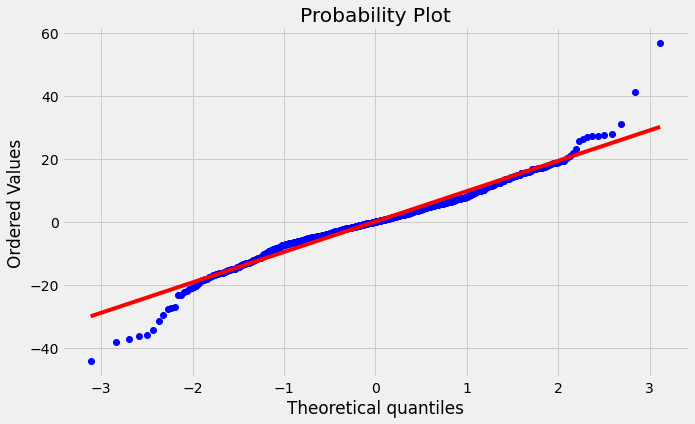

In [181]:
plt.figure(figsize=(10,6))
stats.probplot(double_model.resid, dist="norm", plot=pylab)
plt.show()

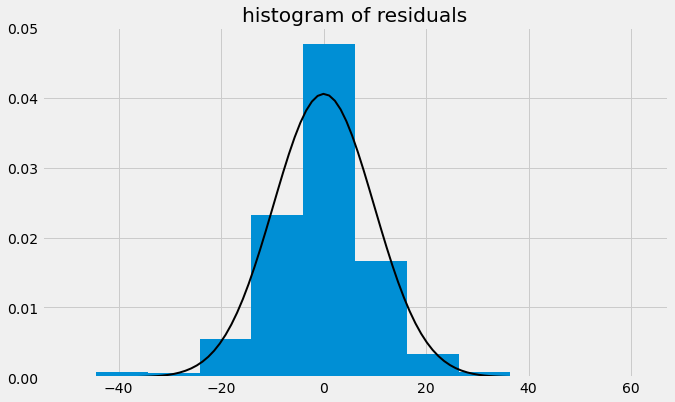

In [184]:
plt.figure(figsize=(10,6))
plt.hist(double_model.resid,density=True)
plt.title('histogram of residuals')
mu, std = norm.fit(double_model.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

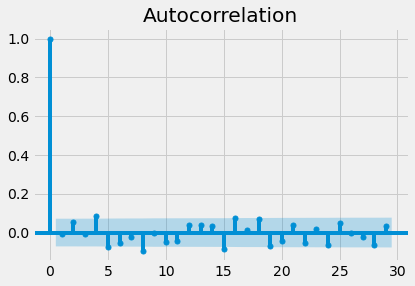

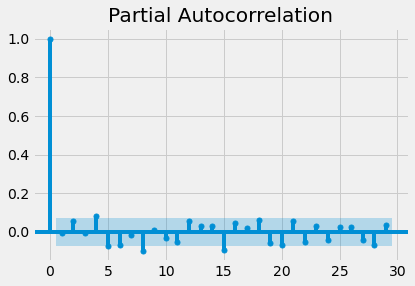

In [185]:
plot_acf(double_model.resid)
plot_pacf(double_model.resid)
plt.show()

In [186]:
mean_squared_error(train['close'],train['double_exp'])

96.60987757125862

In [188]:
mse_double=[]
for i in alpha:
    dmodel=ExponentialSmoothing(train['close'],trend='additive',damped=False,seasonal=None).fit(
        smoothing_level=i)
    pred_double_model=dmodel.forecast()
    for j in range(83):
        dmodel=ExponentialSmoothing(dataset[:train_size+j+1]['close'],trend='additive',damped=False,seasonal=None).fit(
            smoothing_level=i)
        pred_double_model=pred_double_model.append(dmodel.forecast())
    mse_double.append(mean_squared_error(pred_double_model,test['close']))
    print('double exponential model with landa =',i,'and beta= ',dmodel.params['smoothing_trend'],'  MSE will be ',mean_squared_error(pred_double_model,test['close']))

double exponential model with landa = 0.05 and beta=  0.044227655221363626   MSE will be  607.5110559926981
double exponential model with landa = 0.1 and beta=  0.019702540107021323   MSE will be  445.23460066873287
double exponential model with landa = 0.15 and beta=  8.426995741527164e-05   MSE will be  377.6576636489258
double exponential model with landa = 0.2 and beta=  0.0   MSE will be  341.65545024639505
double exponential model with landa = 0.25 and beta=  7.056550550992811e-17   MSE will be  313.7264248140947
double exponential model with landa = 0.3 and beta=  0.0   MSE will be  291.5620571647671
double exponential model with landa = 0.35 and beta=  0.0   MSE will be  274.1608422221986
double exponential model with landa = 0.4 and beta=  0.0   MSE will be  259.94841338283703
double exponential model with landa = 0.45 and beta=  0.0   MSE will be  248.3737154215884
double exponential model with landa = 0.5 and beta=  0.0   MSE will be  238.8912885594557
double exponential mod

In [189]:
pred_double=double_model.forecast(84)
pred_double.index=test.index

In [193]:
pred_double_1step=double_model.forecast()
for i in range(83):
    double_model=ExponentialSmoothing(dataset[:train_size+i+1]['close'],trend='additive',damped=True,seasonal=None).fit()
    pred_double_1step=pred_double_1step.append(double_model.forecast())


In [195]:
pred_double_1step.index=test.index

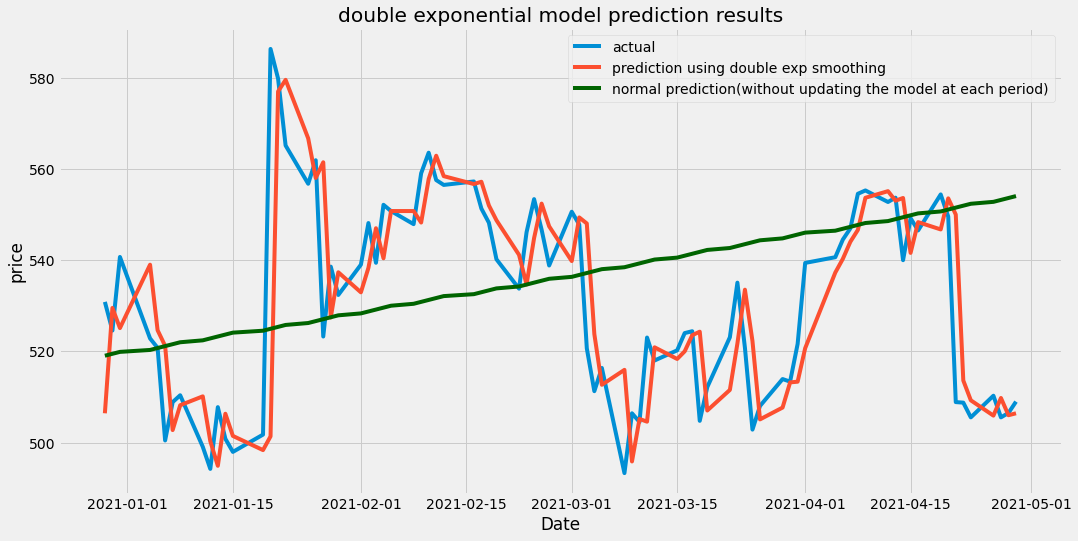

In [196]:
plt.figure(figsize=(16,8))
plt.plot(test['close'],label='actual')
plt.xlabel('Date')
plt.ylabel('price')
plt.plot(pred_double_1step,label='prediction using double exp smoothing')
plt.plot(pred_double,label='normal prediction(without updating the model at each period)',color='darkgreen')
plt.title('double exponential model prediction results')
plt.legend()
plt.show()

# mean squared error of one step ahead prediction

In [265]:
mean_squared_error(pred_double_1step,test['close'])

215.68763384098105

# GARCH MODEL (PREDICTING VOLATILITY)

In [197]:
from arch import arch_model

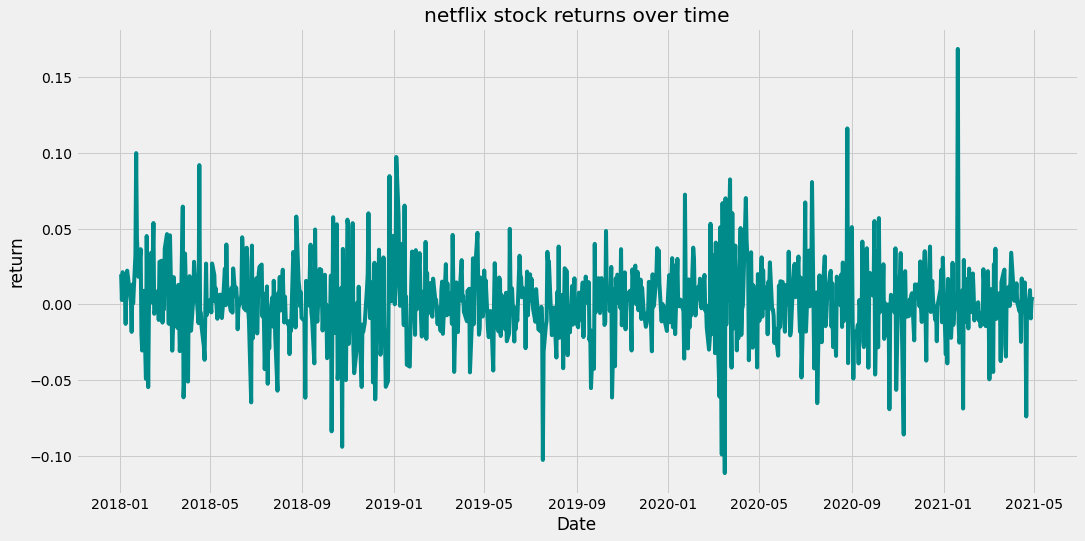

In [198]:
plt.figure(figsize=(16,8))
plt.plot(returns,color='darkcyan')
plt.title('netflix stock returns over time')
plt.xlabel('Date')
plt.ylabel('return')
plt.show()

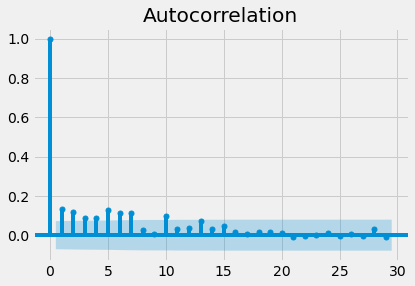

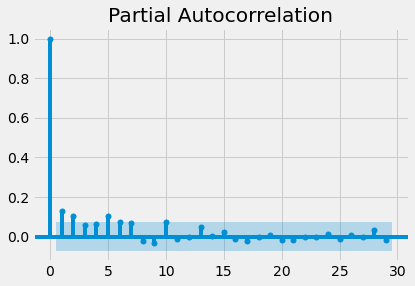

In [21]:
plot_acf(train_returns**2)
plot_pacf(train_returns**2)
plt.show()

In [271]:
gmodel=arch_model(train_returns,p=1,q=1,mean='constant')
gmodel=gmodel.fit(disp='off')
gmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1676.72
Distribution:                  Normal   AIC:                          -3345.45
Method:            Maximum Likelihood   BIC:                          -3326.95
                                        No. Observations:                  753
Date:                Fri, Jul 09 2021   Df Residuals:                      752
Time:                        19:35:28   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.8623e-03  8.775e-04      2.122  3.380e-02 [1.426e-04,3.582e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      6.8092e-05  1.426e-05      4.776  1.792e-06 [4.015e-05,9.604e-05]
alpha[1]       0.0904  3.056e-02      2.958  3.101e-03   [3.049e-02,  0.150]
beta[1]        0.8196  3.292e-02     24.898 7.877e-137     [  0.755,  0.884]
============================================================================

Covariance estimator: robust
"""

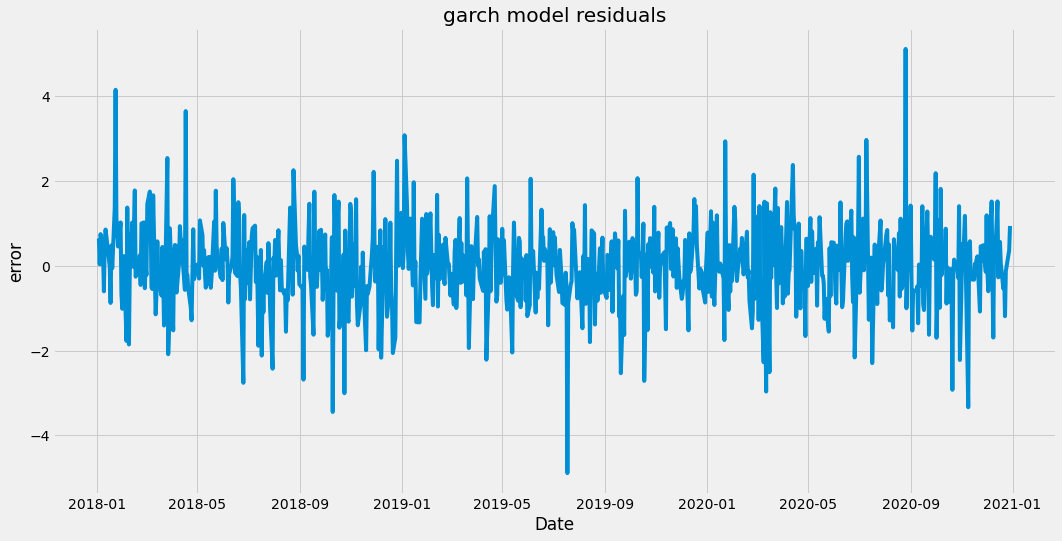

In [272]:
plt.figure(figsize=(16,8))
plt.title('garch model residuals')
plt.xlabel('Date')
plt.ylabel('error')
plt.plot(gmodel.std_resid)

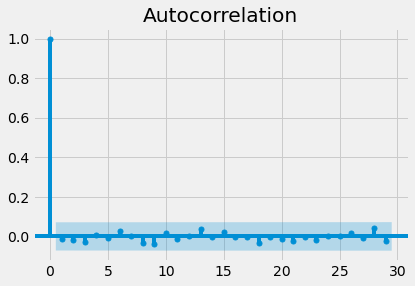

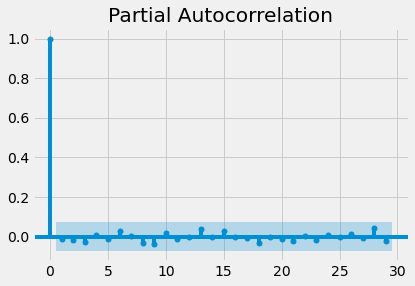

In [273]:
plot_acf(gmodel.std_resid**2)
plot_pacf(gmodel.std_resid**2)
plt.show()

In [274]:
acorr_ljungbox(gmodel.std_resid**2,lags=30,return_df=True)

,lb_stat,lb_pvalue
1,0.089164,0.765242
2,0.338895,0.844131
3,0.894277,0.826809
4,0.958525,0.916018
5,1.030785,0.960045
6,1.682806,0.946441
7,1.694705,0.974794
8,2.589744,0.957415
9,3.698184,0.930132
10,3.978198,0.948325


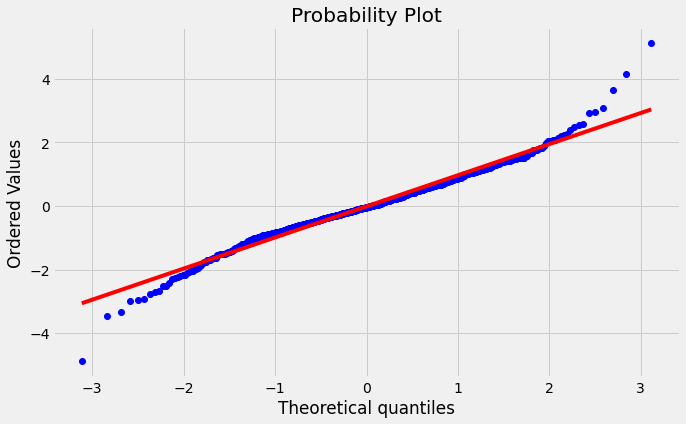

In [275]:
plt.figure(figsize=(10,6))
stats.probplot(gmodel.std_resid, dist="norm", plot=pylab)
plt.show()

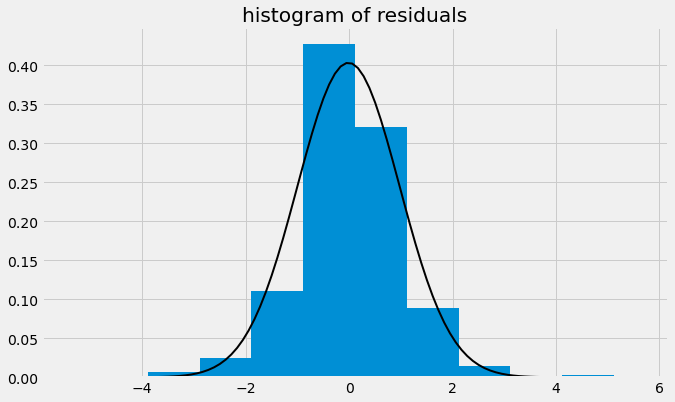

In [276]:
plt.figure(figsize=(10,6))
plt.hist(gmodel.std_resid,density=True)
plt.title('histogram of residuals')
mu, std = norm.fit(gmodel.std_resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

# predict future volatility

In [277]:
garch_prediction=[]
test_size=len(test_returns)
for i in range(test_size):
    gtrain=returns[:-(test_size-i)]
    gmodel=arch_model(gtrain,p=1,q=1)
    gmodel_fit=gmodel.fit(disp='off')
    pred=gmodel_fit.forecast(horizon=1)
    garch_prediction.append(np.sqrt(pred.variance.values[-1,:][0]))

In [278]:
garch_prediction = pd.Series(garch_prediction, index=returns.index[-test_size:])

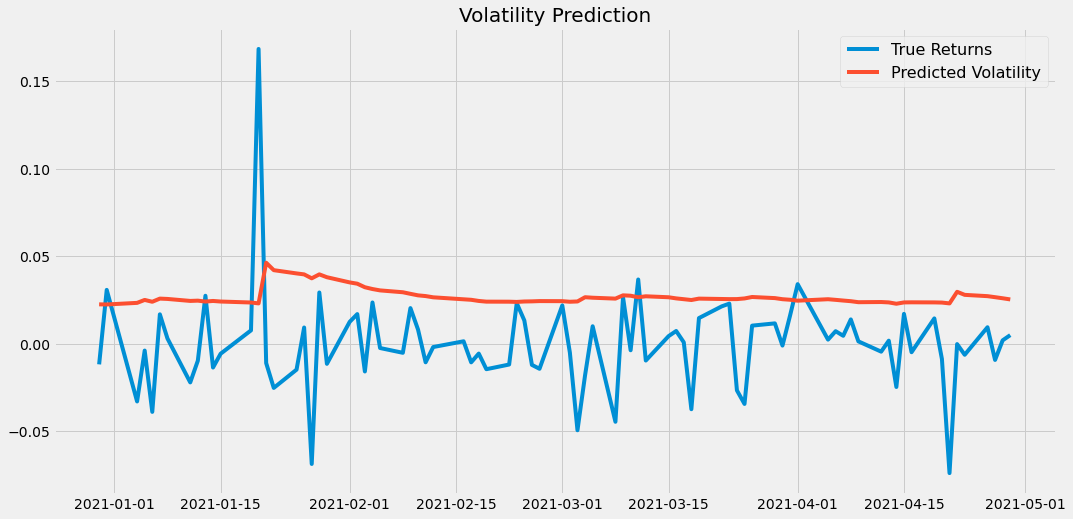

In [279]:
plt.figure(figsize=(16,8))
true, = plt.plot(returns[-test_size:])
preds, = plt.plot(garch_prediction)
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# RECURRENT NEURAL NETWORK

In [206]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.preprocessing.sequence import TimeseriesGenerator

In [209]:
dataset_test = np.array(dataset[int(dataset.shape[0]*0.9):])

In [210]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_dataset=scaler.fit_transform(dataset)

In [211]:
dataset_test=scaler.transform(dataset_test)
x_test, y_test = create_dataset(dataset_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [212]:
scaled_dataset.shape

(837, 1)

In [213]:
test_size=84
train_rnn=dataset[:-test_size]
test_rnn=dataset[len(train_rnn):]
scaled_train=scaled_dataset[:-test_size]
scaled_test=scaled_dataset[len(scaled_train):]

In [214]:
scaled_test[:10]

array([[0.85602297],
       [0.8397228 ],
       [0.88161537],
       [0.83523233],
       [0.82988544],
       [0.77716917],
       [0.79897213],
       [0.8028914 ],
       [0.77356136],
       [0.76097277]])

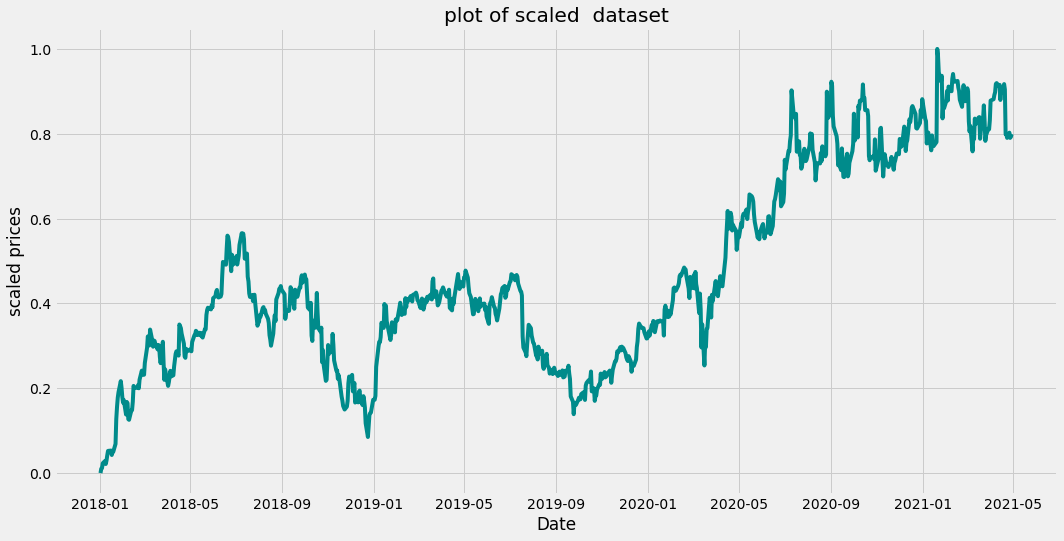

In [216]:
plt.figure(figsize=(16,8))
plt.plot(RNN_dataset.index,scaled_dataset,color='darkcyan')
plt.title('plot of scaled  dataset')
plt.xlabel('Date')
plt.ylabel('scaled prices')
plt.show()

In [217]:
#define generator
generator=TimeseriesGenerator(scaled_train,scaled_train,length=30,batch_size=1)

In [218]:
x,y=generator[0]
print(f'given the array : \n{x.flatten()}')
print(f'predict this y : \n{y}')

given the array : 
[0.         0.01033041 0.01183585 0.02315259 0.02849948 0.02138757
 0.02971941 0.04197056 0.05232691 0.05310559 0.0426454  0.0499909
 0.05032834 0.06880887 0.12775452 0.15633187 0.17813482 0.19085316
 0.216783   0.20175455 0.17969211 0.16611726 0.1722428  0.13805899
 0.16780437 0.16479349 0.12726139 0.12562616 0.14763673 0.14846725]
predict this y : 
[[0.16853113]]


In [219]:
del model

In [220]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [221]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,activation='relu',input_shape=(30,1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [222]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics='accuracy')

In [253]:
LSTM_model=model.fit(generator,epochs=20,validation_data=(x_test,y_test))

723/723 [==============================] - 10s 14ms/step - loss: 9.6535e-04 - accuracy: 0.0000e+00 - val_loss: 7.6871e-04 - val_accuracy: 0.0000e+00


In [224]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


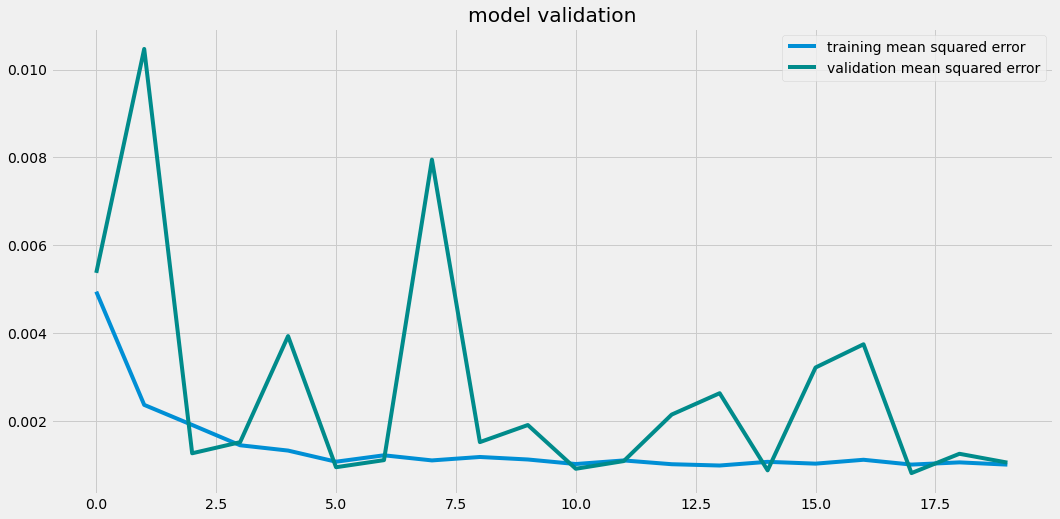

In [227]:
plt.figure(figsize=(16,8))
plt.plot(LSTM_model.history['loss'],label='training mean squared error')
plt.plot(LSTM_model.history['val_loss'],label='validation mean squared error',color='darkcyan')
plt.title('model validation')
plt.legend()
plt.show()

In [226]:
fitted=[]
for i in range(len(generator)):
    fitted.append(model.predict(generator[i][0])[0])

In [228]:
scaler.inverse_transform(fitted)

array([[264.03021046],
       [269.57678038],
       [281.63975388],
       [282.00633782],
       [280.8337216 ],
       [281.65294663],
       [279.13733366],
       [284.40191858],
       [291.94148944],
       [290.36509927],
       [289.95163456],
       [288.8115926 ],
       [296.48667333],
       [309.32470083],
       [319.95440656],
       [317.75343323],
       [313.20625148],
       [324.09147633],
       [317.92972695],
       [312.29830549],
       [315.80585485],
       [316.62146308],
       [314.84188847],
       [310.7185511 ],
       [313.02190891],
       [312.97092909],
       [305.55888816],
       [299.56750783],
       [313.79561953],
       [301.87251904],
       [288.22662214],
       [292.03526245],
       [282.79429753],
       [282.79990072],
       [287.41717972],
       [292.40324719],
       [289.1449478 ],
       [288.74240242],
       [294.68046062],
       [300.05673039],
       [305.12541043],
       [307.62485683],
       [304.81310162],
       [327

In [232]:
train2=train_rnn[30:]
train2

,close
date,
2018-02-14,266.000000
2018-02-15,280.269989
2018-02-16,278.519989
2018-02-20,278.549988
2018-02-21,281.040009
...,...
2020-12-21,528.909973
2020-12-22,527.330017
2020-12-23,514.479980


In [233]:
train2['fitted']=scaler.inverse_transform(fitted)
resid=train2['close']-train2['fitted']

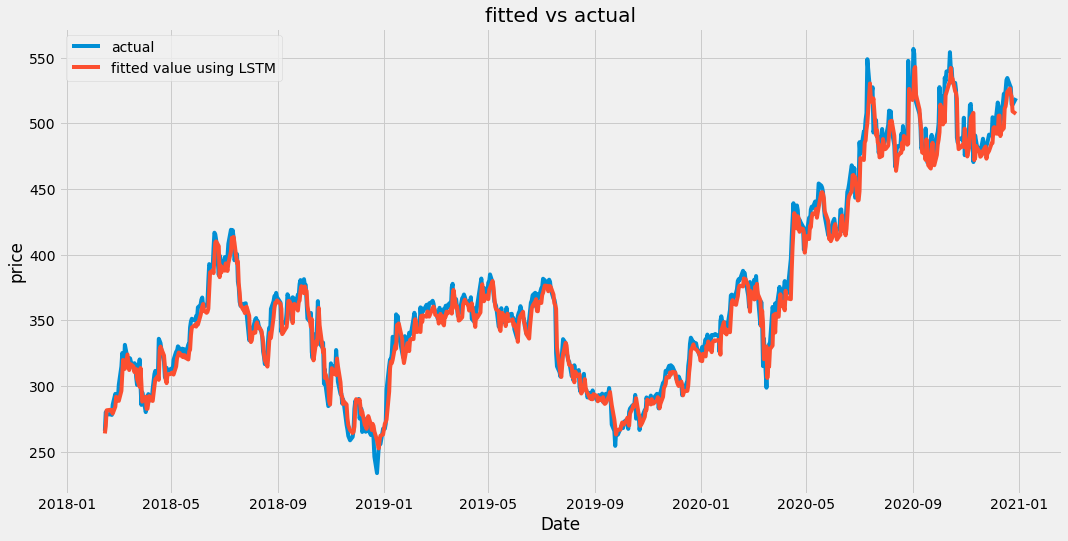

In [234]:
plt.figure(figsize=(16,8))
plt.plot(train2['close'],label='actual')
plt.plot(train2['fitted'],label='fitted value using LSTM')
plt.xlabel('Date')
plt.ylabel('price')
plt.title('fitted vs actual')
plt.legend()
plt.show()

In [235]:
mean_squared_error(train2['fitted'],train2['close'])

115.5039161489512

In [236]:
train2.head()

,close,fitted
date,,
2018-02-14,266.000000,264.030210
2018-02-15,280.269989,269.576780
2018-02-16,278.519989,281.639754
2018-02-20,278.549988,282.006338
2018-02-21,281.040009,280.833722


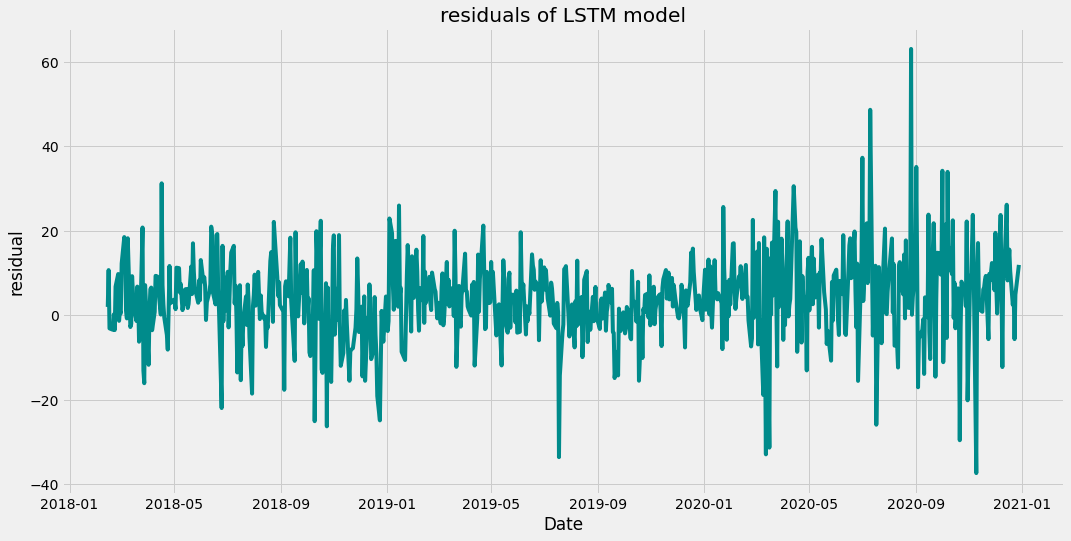

In [238]:
plt.figure(figsize=(16,8))
plt.plot(resid,color='darkcyan')
plt.title('residuals of LSTM model')
plt.xlabel('Date')
plt.ylabel('residual')
plt.show()

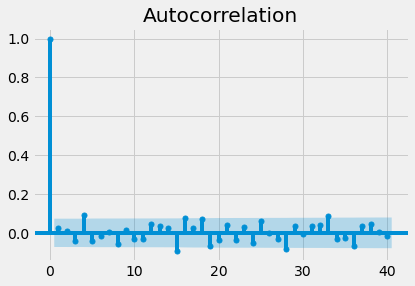

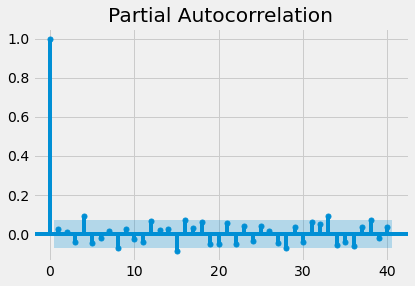

In [356]:
plot_acf(resid,lags=40)
plot_pacf(resid,lags=40)
plt.show()

In [357]:
acorr_ljungbox(resid,return_df=True,lags=20,boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.377331,0.539035,0.375769,0.539876
2,0.478677,0.787148,0.476557,0.787983
3,1.741805,0.627680,1.730973,0.630070
4,7.707041,0.102919,7.646841,0.105406
5,9.132438,0.103897,9.058476,0.106754
6,9.382151,0.153199,9.305434,0.157115
7,9.399951,0.225202,9.323013,0.230289
8,11.732072,0.163564,11.622966,0.168835
9,11.872079,0.220617,11.760850,0.227130
10,12.496205,0.253218,12.374645,0.260765


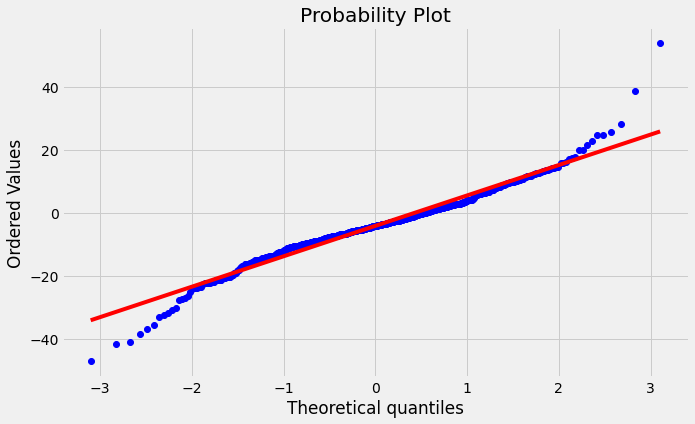

In [358]:
plt.figure(figsize=(10,6))
stats.probplot(resid, dist="norm", plot=pylab)
plt.show()

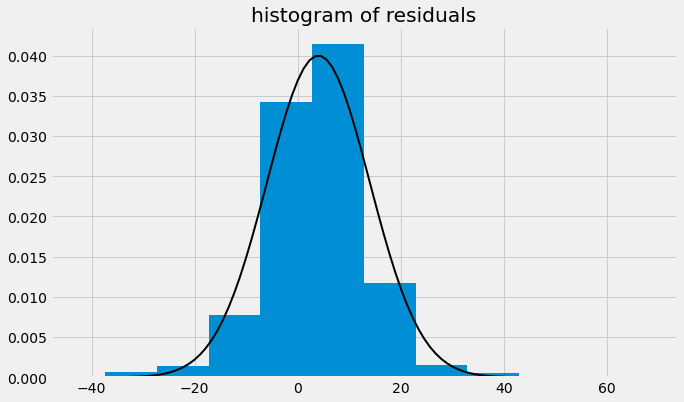

In [239]:
plt.figure(figsize=(10,6))
plt.hist(resid,density=True)
plt.title('histogram of residuals')
mu, std = norm.fit(resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

In [254]:
last_train_batch=scaled_train[-30:]
last_train_batch=last_train_batch.reshape((1,30,1))

In [255]:
model.predict(last_train_batch)

array([[0.82432914]], dtype=float32)

In [256]:
scaled_test[0]

array([0.85602297])

In [257]:
test_prediction=[]
current_batch=last_train_batch
for i in range(len(test_rnn)):
    current_pred=model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    #update current batch
    current_batch=np.append(current_batch[:,1:],scaled_test[i].reshape((1,1,1)),axis=1)

In [258]:
test_prediction[:5]

[array([0.82432914], dtype=float32),
 array([0.85044825], dtype=float32),
 array([0.84130585], dtype=float32),
 array([0.87288827], dtype=float32),
 array([0.83907336], dtype=float32)]

In [259]:
test_prediction=scaler.inverse_transform(test_prediction)

In [260]:
test_rnn['prediction']=test_prediction

In [261]:
test_rnn.head()

,close,prediction
date,,
2020-12-29,530.869995,518.659310
2020-12-30,524.590027,528.722222
2020-12-31,540.729980,525.199929
2021-01-04,522.859985,537.367687
2021-01-05,520.799988,524.339817


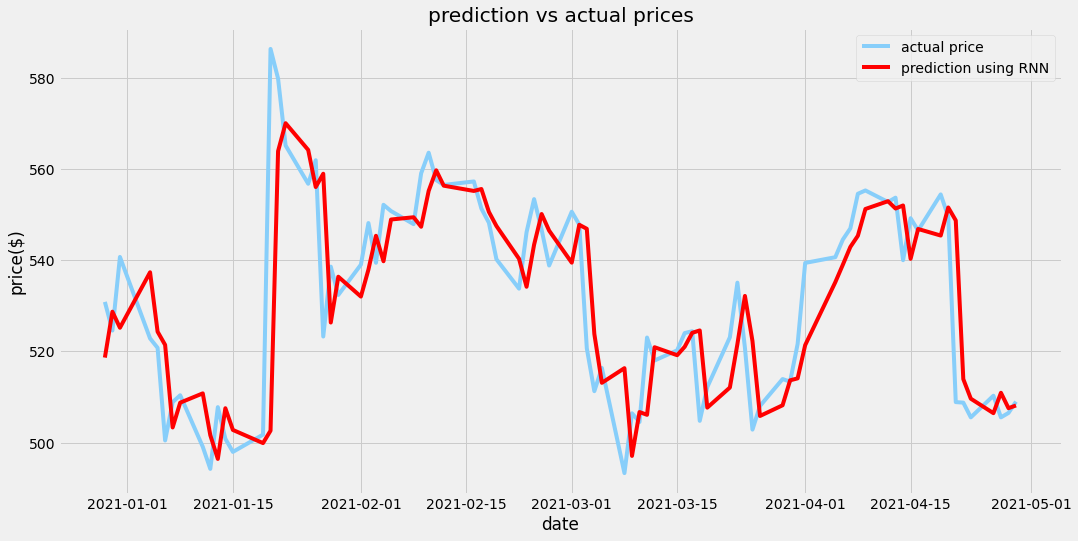

In [263]:
plt.figure(figsize=(16,8))
plt.plot(test_rnn['close'],label='actual price',color='lightskyblue')
plt.plot(test_rnn['prediction'],label='prediction using RNN',color='red')
plt.title('prediction vs actual prices')
plt.xlabel('date')
plt.ylabel('price($)')
plt.legend()
plt.show()

 # mean squared error of one step ahead prediction

In [264]:
mean_squared_error(test_rnn['close'],test_rnn['prediction'])

202.67323890317698